## Satistics

------

In [1]:
import numpy as np

In [2]:
A = np.random.rand(10,10)
A

array([[0.53898357, 0.48321424, 0.48657007, 0.35605779, 0.9860772 ,
        0.42402917, 0.23469293, 0.77512796, 0.65273786, 0.43154989],
       [0.81875766, 0.65695979, 0.76617078, 0.71948083, 0.27799913,
        0.09989388, 0.51315167, 0.18091894, 0.51749444, 0.62905224],
       [0.1374541 , 0.9622578 , 0.85497674, 0.58092092, 0.61634624,
        0.75700743, 0.47009552, 0.06667401, 0.71219479, 0.15592976],
       [0.90037695, 0.00539437, 0.87065549, 0.52165907, 0.2324389 ,
        0.30774764, 0.59232791, 0.65973898, 0.79159998, 0.04817417],
       [0.17901896, 0.9111165 , 0.81534322, 0.89307325, 0.22228122,
        0.88212989, 0.03313646, 0.47521496, 0.55507649, 0.61302788],
       [0.6292293 , 0.58638646, 0.68864491, 0.30865223, 0.44586232,
        0.06050179, 0.77529863, 0.09410935, 0.77237024, 0.09680208],
       [0.24322844, 0.83163841, 0.11213468, 0.48985132, 0.49384274,
        0.31981422, 0.05734624, 0.64686832, 0.5254565 , 0.46958156],
       [0.92671612, 0.88635405, 0.8485796

In [28]:
A.shape

(10, 10)

In [29]:
A.max()

0.9973975789240529

In [30]:
A.min()

0.0035974071135107533

In [31]:
A.mean()

0.53281080467131514

In [33]:
np.median(A)

0.53842941044090042

In [5]:
A.std()

0.30117722286159915

#### Mean and std of row

In [8]:
np.mean(A,axis =0)

array([ 0.39053118,  0.38187714,  0.45877901,  0.61380263,  0.64927112,
        0.46921661,  0.60222378,  0.50624244,  0.27490776,  0.54313828])

In [9]:
np.std(A,axis =0)

array([ 0.32438441,  0.29543643,  0.35045695,  0.27228791,  0.2178827 ,
        0.26696293,  0.32834441,  0.1804856 ,  0.18123375,  0.31624931])

#### Mean and std of col

In [7]:
np.mean(A,axis =1)

array([ 0.24116424,  0.48699354,  0.4219599 ,  0.43972281,  0.47657735,
        0.57537948,  0.55289209,  0.66313705,  0.46013377,  0.57202973])

In [11]:
np.std(A,axis = 1)

array([ 0.19852809,  0.33144078,  0.28219183,  0.27736838,  0.22851456,
        0.33649951,  0.31209182,  0.20212544,  0.27845001,  0.31922731])

---------

### Standard scalar :  feature scaling

In [18]:
A_ss = A - A.min()/A.max()-A.min()

In [19]:
A_ss

array([[  4.10527053e-01,   7.54472423e-01,   7.94834247e-01,
          7.30222536e-01,   2.05492062e-01,   7.26892063e-01,
          7.31928243e-01,   5.75438370e-01,   5.93092716e-01,
          3.64078100e-01],
       [  6.91227074e-01,   3.26851066e-01,   6.93898234e-01,
          5.00701344e-02,   7.09305332e-01,   8.38725771e-02,
          7.42069173e-03,   7.35359172e-01,   2.95379821e-01,
          6.85238478e-01],
       [  7.79833365e-01,   7.41786430e-01,   3.19212366e-01,
          6.81133292e-01,   8.84713319e-01,   6.79371426e-01,
          5.60580679e-01,   1.38029784e-01,   8.13389121e-02,
          8.39869709e-01],
       [  4.95468619e-01,   8.24202013e-01,  -5.68858232e-04,
          4.31268827e-01,   3.38998416e-01,   9.81193130e-01,
          4.35576371e-01,   6.44445825e-02,   4.62408333e-02,
          6.89168348e-01],
       [  4.83093638e-01,   4.35554299e-01,   8.99866132e-01,
          9.27827109e-01,   2.75868637e-01,   2.11364337e-01,
          5.98421053e-01

-------

### Normalization :  sample Normalization

In [3]:
B = np.random.rand(5,5)

In [4]:
Bn = (B-B.mean())/B.std()

In [5]:
Bn

array([[ 1.10700499, -1.58861252, -1.10418153,  1.1424935 ,  0.96929009],
       [-0.44764127, -1.08667804,  0.37125034,  1.47084221, -0.46509629],
       [-0.94312492,  0.75528498, -0.20116912,  0.15058261,  1.12978521],
       [-1.74134568,  1.4336299 , -1.11531202,  0.11896235, -1.06880784],
       [ 0.69507059,  1.17572665, -1.19415594,  0.54516859, -0.10896685]])

------

### Normal Distribution

In [57]:
x = np.arange(-20,20,0.01)

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as math
sns.set()

$f(x,\mu,\sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}} e ^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}$

In [63]:
def normal(x,m,s):
    f = (1/np.sqrt(2*np.pi*s))*np.exp(-(x-m)**2/(2*s**2))
    return f

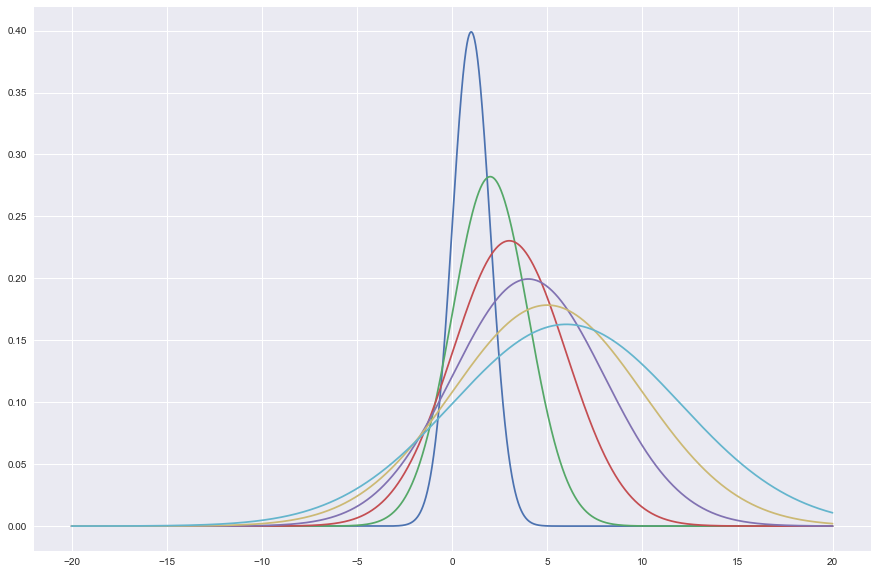

In [67]:
plt.figure(figsize = [15,10])
plt.plot(x,normal(x,1.0,1.0),\
        x,normal(x,2.0,2.0),\
        x,normal(x,3.0,3.0),\
        x,normal(x,4.0,4.0),\
        x,normal(x,5.0,5.0),\
        x,normal(x,6.0,6.0))
plt.show()

### Scipy

Reference: https://docs.scipy.org/doc/scipy/reference/stats.html